<font size=6>Random Forest</font><br>
<font size=5>Autor: <font color="#2890f9"> William Mendez <br></font>
<font size=3>GitHub: <font color="#A371F7"> @WilliamMendez <br></font>
<font size=3>Cuenta uniandes: <font color="#FFF200"> w.mendez</font>

Importamos las librerias necesarias

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import seaborn as sns
import pickle as pkl
import os
from datetime import datetime

In [106]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

Cargamos los datos y los revisamos

In [107]:
data = pd.read_csv('data/datos_convertidos.csv')

In [108]:
data.head()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0,26.50,0,0,0,0,0,0,1,60,0,0,1,3,8.0,0,0,0,0
1,1,28.75,0,0,0,0,2,0,1,55,0,0,1,3,7.0,0,0,0,0
2,2,19.90,1,0,0,0,1,0,1,65,0,0,1,2,7.0,0,0,0,0
3,3,28.06,0,0,0,1,1,0,0,65,0,1,1,2,8.0,0,0,0,0
4,4,29.29,1,0,0,0,1,0,0,70,0,0,1,3,7.0,1,0,0,0


In [109]:
data.describe()

,Index,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.00000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000,61874.000000
mean,33783.843779,28.300153,0.437163,0.067540,0.076042,3.430666,3.941559,0.139558,0.535346,64.663510,0.71665,0.225038,0.776530,2.609901,7.102267,0.132624,0.037092,0.094337,0.086094
std,19500.423273,6.211283,0.496040,0.250958,0.265067,8.100786,8.117292,0.346530,0.574922,7.464508,1.45877,0.510276,0.416574,1.025881,1.408602,0.339171,0.188988,0.292299,0.280506
min,0.000000,12.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16885.250000,24.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.00000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,33829.500000,27.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.00000,0.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,50690.750000,31.190000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,65.000000,1.00000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,67499.000000,86.800000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,2.000000,80.000000,5.00000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
data.dtypes

Index                 int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
HeartDisease          int64
dtype: object

In [111]:
data.isnull().mean()

Index               0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
HeartDisease        0.0
dtype: float64

Como los datos ya fueron preprocesados podemos empezar con el analisis para implementar el modelo de SVM

<AxesSubplot:title={'center':'# personas que han reportado CHD o MI'}, xlabel='HeartDisease', ylabel='count'>

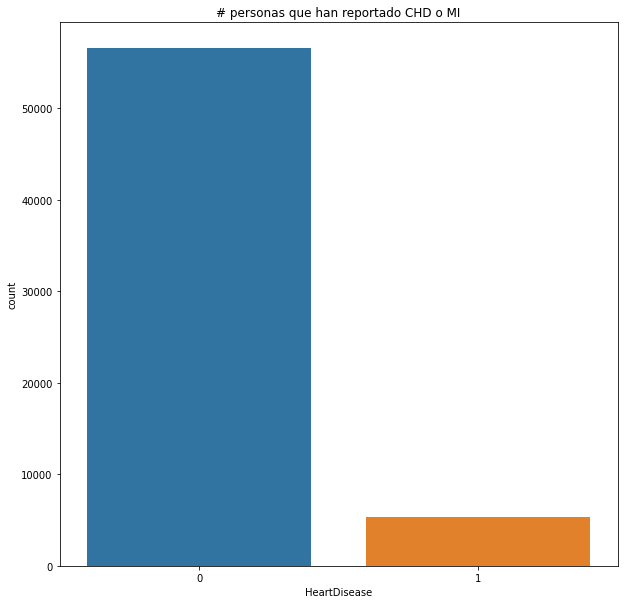

In [112]:
fig = plt.figure(figsize=(10, 10))
plt.title('# personas que han reportado CHD o MI')
sns.countplot(x='HeartDisease', data=data)


<b>Seleccionamos las variables que vamos a utilizar para el modelo </b><br>
Como en el preprocesamiento se transformaron las variables categoricas a numericas, podemos utilizarlas directamente en el modelo

In [113]:
features = list(data.columns)
features.remove('Index')
features.remove('HeartDisease')
print(features)

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


Generamos el conjunto de entrenamiento y de prueba

In [114]:
x_train, x_test, y_train, y_test = train_test_split(data[features], data['HeartDisease'], test_size=0.2, random_state=28)

<AxesSubplot:title={'center':'Distribución de los datos de prueba'}, xlabel='HeartDisease', ylabel='count'>

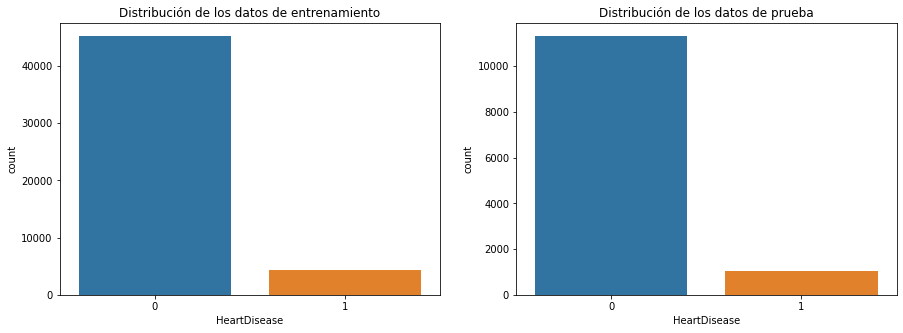

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Distribución de los datos de entrenamiento')
sns.countplot(x=y_train, ax=ax[0])
ax[1].set_title('Distribución de los datos de prueba')
sns.countplot(x=y_test, ax=ax[1])

In [116]:
modeloReferencia = RandomForestClassifier(random_state=14, n_jobs=-1, n_estimators=10, max_depth=10, min_samples_leaf=4, min_samples_split=4)

In [117]:
modeloReferencia.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1,
                       random_state=14)

In [118]:
pred_train = modeloReferencia.predict(x_train)
pred_test = modeloReferencia.predict(x_test)


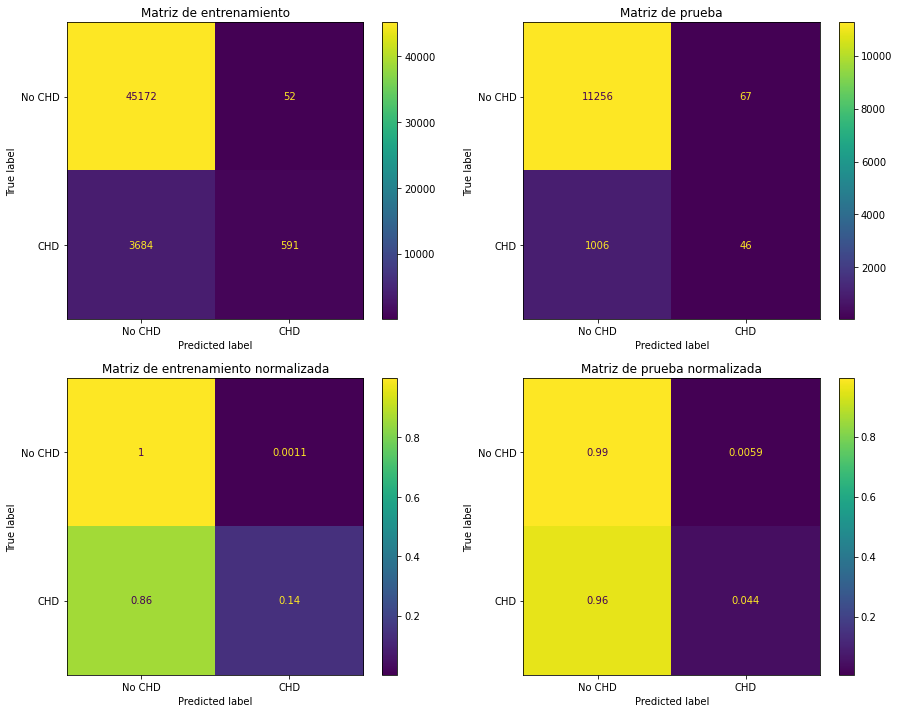

In [119]:
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)
cm_train_norm = confusion_matrix(y_train, pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, pred_test, normalize='true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
ax1.set_title('Matriz de entrenamiento')
ax2.set_title('Matriz de prueba')
ax3.set_title('Matriz de entrenamiento normalizada')
ax4.set_title('Matriz de prueba normalizada')
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['No CHD', 'CHD']).plot(ax=ax1)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['No CHD', 'CHD']).plot(ax=ax2)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=['No CHD', 'CHD']).plot(ax=ax3)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=['No CHD', 'CHD']).plot(ax=ax4)

plt.show()

In [120]:
pd.DataFrame([{'Train': accuracy_score(y_train, pred_train), 'Test': accuracy_score(y_test, pred_test)},
              {'Train': precision_score(y_train, pred_train), 'Test': precision_score(y_test, pred_test)}, 
              {'Train': recall_score(y_train, pred_train), 'Test': recall_score(y_test, pred_test)}, 
              {'Train': f1_score(y_train, pred_train), 'Test': f1_score(y_test, pred_test)}
              ], index=['Accuracy', 'Precision', 'Recall', 'F1'])

,Train,Test
Accuracy,0.924524,0.913293
Precision,0.919129,0.407080
Recall,0.138246,0.043726
F1,0.240342,0.078970


<AxesSubplot:ylabel='Feature'>

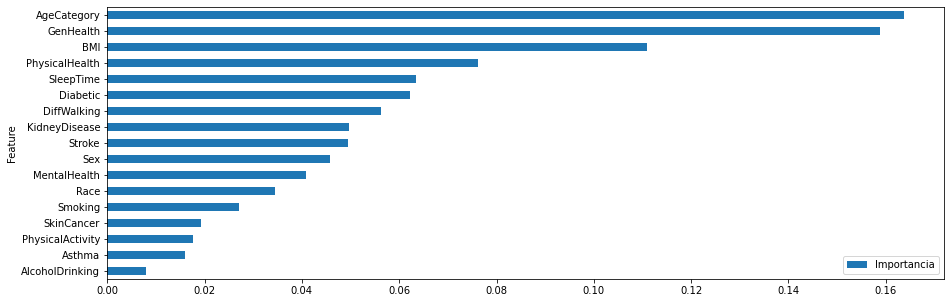

In [121]:
importancia = pd.DataFrame({'Feature': features, 'Importancia': modeloReferencia.feature_importances_})
importancia.columns = ['Feature', 'Importancia']
importancia = importancia.sort_values(by='Importancia', ascending=True)
importancia.plot.barh(x='Feature', y='Importancia', figsize=(15, 5))

Ahora probaremos con multiples parametros para encontrar el mejor modelo

In [122]:
parametros = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200],
                'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30],
                'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30],
                'max_features': ['auto', 'sqrt', 'log2']}


In [123]:
mejor_fit = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=14, n_jobs=-1), 
                                param_distributions=parametros,
                                n_iter=500,
                                cv=3,
                                scoring=['precision', 'recall', 'f1'],
                                refit='f1',
                                n_jobs=-1,
                                verbose=3,
                                random_state=14)

In [124]:
mejor_fit.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=14),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 20,
                                                             30],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 20,
                                                              30],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         200]},
                   random_state=14, refit='f1',
                   scoring=['precision', 'recall', 'f1'], verbose=3)

In [125]:
results = pd.DataFrame( mejor_fit.cv_results_)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,2.990623,0.791429,1.939269,0.383966,50,6,6,sqrt,30,"{'n_estimators': 50, 'min_samples_split': 6, '...",0.596639,0.544554,0.630435,0.590543,0.035324,288,0.049825,0.038596,0.040702,0.043041,0.004873,72,0.091969,0.072084,0.076467,0.080173,0.008531,74
1,1.086336,0.716470,0.894494,0.608324,20,8,8,log2,2,"{'n_estimators': 20, 'min_samples_split': 8, '...",0.000000,0.000000,0.000000,0.000000,0.000000,408,0.000000,0.000000,0.000000,0.000000,0.000000,408,0.000000,0.000000,0.000000,0.000000,0.000000,408
2,1.068837,0.460275,1.309421,0.658818,10,9,6,log2,7,"{'n_estimators': 10, 'min_samples_split': 9, '...",0.482759,0.615385,0.607843,0.568662,0.060821,316,0.039298,0.011228,0.021754,0.024094,0.011578,191,0.072680,0.022054,0.042005,0.045580,0.020822,192
3,4.579583,0.176989,1.165867,0.439143,80,6,1,sqrt,10,"{'n_estimators': 80, 'min_samples_split': 6, '...",0.548148,0.616279,0.641304,0.601911,0.039365,273,0.051930,0.037193,0.041404,0.043509,0.006198,69,0.094872,0.070152,0.077785,0.080936,0.010335,69
4,2.121497,0.189710,0.708456,0.292527,20,7,20,auto,20,"{'n_estimators': 20, 'min_samples_split': 7, '...",0.597015,0.707317,0.647059,0.650464,0.045095,159,0.028070,0.020351,0.023158,0.023860,0.003190,192,0.053619,0.039563,0.044715,0.045966,0.005806,191
5,2.750262,0.050054,1.683301,0.651228,90,20,3,log2,3,"{'n_estimators': 90, 'min_samples_split': 20, ...",0.000000,0.000000,0.000000,0.000000,0.000000,408,0.000000,0.000000,0.000000,0.000000,0.000000,408,0.000000,0.000000,0.000000,0.000000,0.000000,408
6,3.636708,0.147668,0.990929,0.110578,80,9,2,auto,5,"{'n_estimators': 80, 'min_samples_split': 9, '...",0.600000,0.833333,0.846154,0.759829,0.113137,32,0.008421,0.003509,0.007719,0.006550,0.002169,328,0.016609,0.006988,0.015299,0.012965,0.004260,332
7,3.355694,0.144175,0.975632,0.180491,60,7,2,auto,7,"{'n_estimators': 60, 'min_samples_split': 7, '...",0.623188,0.714286,0.717391,0.684955,0.043694,102,0.030175,0.017544,0.023158,0.023626,0.005167,193,0.057564,0.034247,0.044867,0.045559,0.009532,193
8,2.136338,0.175127,1.542185,0.042932,60,5,30,log2,5,"{'n_estimators': 60, 'min_samples_split': 5, '...",0.545455,0.750000,0.714286,0.669913,0.089205,116,0.004211,0.002105,0.003509,0.003275,0.000875,349,0.008357,0.004199,0.006983,0.006513,0.001730,349
9,2.987922,0.287430,1.018366,0.102359,80,30,6,sqrt,4,"{'n_estimators': 80, 'min_samples_split': 30, ...",0.600000,0.000000,0.500000,0.366667,0.262467,366,0.002105,0.000000,0.000702,0.000936,0.000875,364,0.004196,0.000000,0.001402,0.001866,0.001744,365


In [126]:
mejor_fit.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [127]:
mejor_fit.best_score_

0.15018094101442706

In [128]:
best_results = results[[ c for c in results.columns if 'split' in c][1:]].iloc[mejor_fit.best_index_].reset_index()
best_results['split'], best_results['set'], best_results['metric'] = zip(*list(best_results['index'].apply(lambda x: x.split('_'))))
best_results.rename(columns = {mejor_fit.best_index_: 'value'}, inplace = True)
best_results.drop(columns = 'index', inplace = True)

In [129]:
best_results.head()

,value,split,set,metric
0,0.424242,split0,test,precision
1,0.457031,split1,test,precision
2,0.384127,split2,test,precision
3,0.108070,split0,test,recall
4,0.082105,split1,test,recall


<AxesSubplot:xlabel='metric', ylabel='value'>

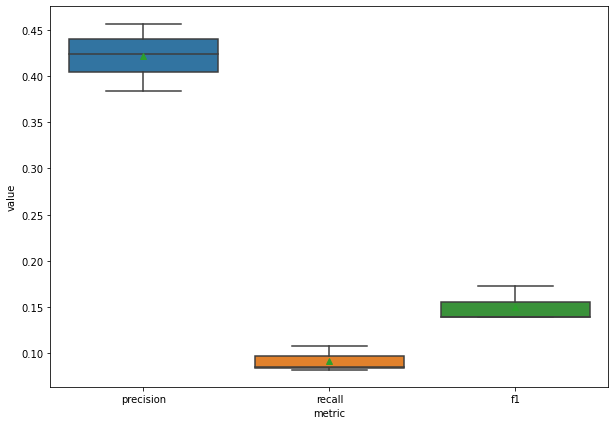

In [130]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'metric', y = 'value', showmeans = True, data = best_results)

In [137]:
filename = 'RF/'+ str(datetime.now().strftime("%d-%H-%M-%S")) + '.pkl'

In [138]:
pkl.dump(mejor_fit, open(filename, 'wb'))

In [139]:
lista_modelos = [f for f in os.listdir('RF') if f.endswith('.pkl')]
lista_modelos

['04-11-42-57.pkl', '11-06-48.pkl', '11-20-42.pkl']

In [140]:
mejor_score = 0
mejor_fit = None
for m in lista_modelos:
    modelo = pkl.load(open('RF/' + m, 'rb'))
    print(m, modelo.best_score_)
    print(modelo.best_params_)
    if modelo.best_score_ > mejor_score:
        mejor_score = modelo.best_score_
        mejor_fit = modelo

04-11-42-57.pkl 0.15018094101442706
{'n_estimators': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
11-06-48.pkl 0.0998859455922919
{'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
11-20-42.pkl 0.0998859455922919
{'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


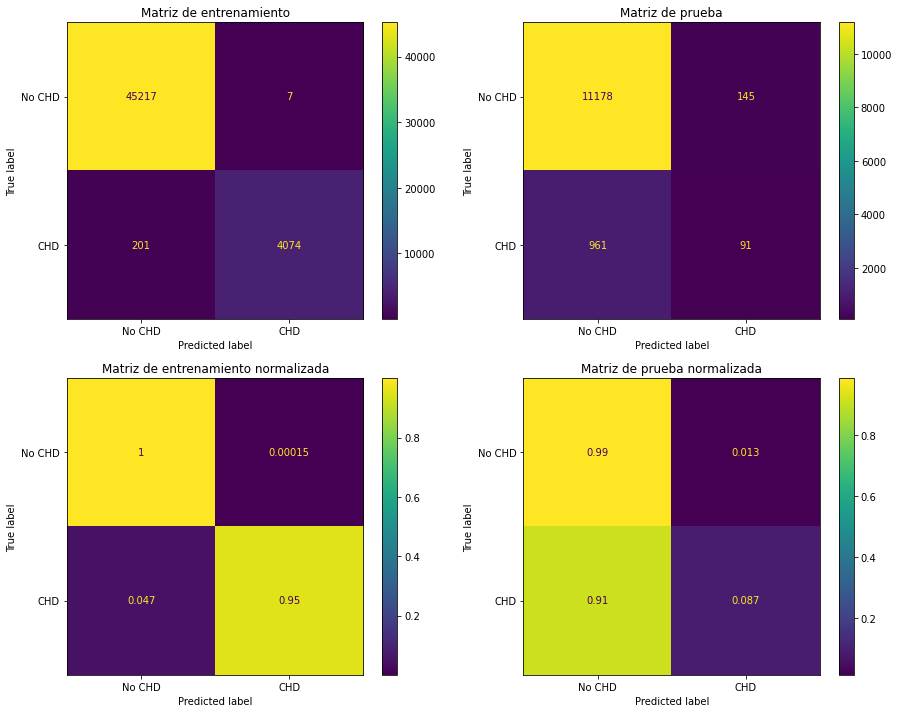

In [141]:
mejor_pred_train = mejor_fit.predict(x_train)
mejor_pred_test = mejor_fit.predict(x_test)

cm_train = confusion_matrix(y_train, mejor_pred_train)
cm_test = confusion_matrix(y_test, mejor_pred_test)
cm_train_norm = confusion_matrix(y_train, mejor_pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, mejor_pred_test, normalize='true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
ax1.set_title('Matriz de entrenamiento')
ax2.set_title('Matriz de prueba')
ax3.set_title('Matriz de entrenamiento normalizada')
ax4.set_title('Matriz de prueba normalizada')
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['No CHD', 'CHD']).plot(ax=ax1)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['No CHD', 'CHD']).plot(ax=ax2)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=['No CHD', 'CHD']).plot(ax=ax3)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=['No CHD', 'CHD']).plot(ax=ax4)

plt.show()

In [142]:
pd.DataFrame([{'Train': accuracy_score(y_train, mejor_pred_train), 'Test': accuracy_score(y_test, mejor_pred_test)},
                {'Train': precision_score(y_train, mejor_pred_train), 'Test': precision_score(y_test, mejor_pred_test)},
                {'Train': recall_score(y_train, mejor_pred_train), 'Test': recall_score(y_test, mejor_pred_test)},
                {'Train': f1_score(y_train, mejor_pred_train), 'Test': f1_score(y_test, mejor_pred_test)}
                ], index=['Accuracy', 'Precision', 'Recall', 'F1'])


,Train,Test
Accuracy,0.995798,0.910626
Precision,0.998285,0.385593
Recall,0.952982,0.086502
F1,0.975108,0.141304


<AxesSubplot:ylabel='Feature'>

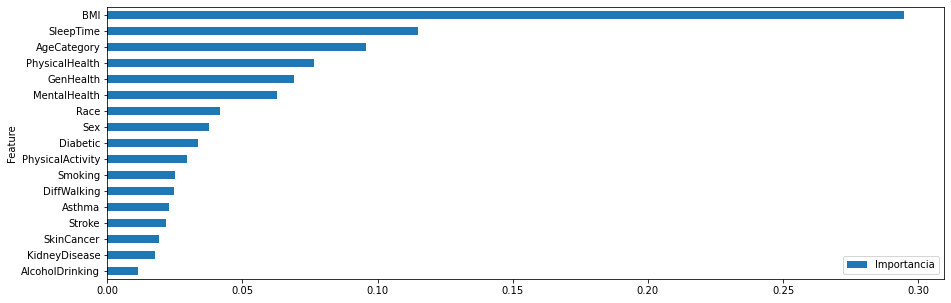

In [143]:
importancia = pd.DataFrame({'Feature': features, 'Importancia': mejor_fit.best_estimator_.feature_importances_})
importancia.columns = ['Feature', 'Importancia']
importancia = importancia.sort_values(by='Importancia', ascending=True)
importancia.plot.barh(x='Feature', y='Importancia', figsize=(15, 5))

In [146]:
fig, axes = plt.subplots(3, 1, figsize=(5, 15))
for i in range(3):
    tree.plot_tree(mejor_fit.best_estimator_.estimators_[i], 
                   ax=axes[i], feature_names=features, 
                   class_names=['No CHD', 'CHD'], filled=True, 
                   rounded=True, fontsize=5)